# Import libraries and Read data

Fb Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

In [1]:
# Import Libraries

import pandas as pd
from pandas import to_datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
# Read Data
rawdata= pd.read_excel(  r'C:\Users\MMM-SM\21Pypractice\project\DEXINUS.xls', skiprows=10, parse_dates=True)

In [3]:
rawdata.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


# Data preprocessing

## Fill `'NA'` Values

In [4]:
rawdata['DEXINUS'].fillna(method='ffill', inplace=True)
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12649 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Facebook Prophet predicts data only when it is in a certain format. The dataframe with the data should have column saved as ds for time series data and y for the data to be forecasted. Here, the time series is the column 'Date' and the data to be forecasted is the column 'DEXINUS'. So let’s make a new dataframe with new column names and the same data. Also, ds should be in a datetime format.

 ## Rename the columns as per the norms of the FBPROPHET

In [5]:
#prepare expected column names
df=rawdata.rename(columns={'observation_date':'ds','DEXINUS':'y'})
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


## Select the data from 1990 for training

In [6]:
start_date = '1990-01-01'
end_date = '2021-06-25'

In [7]:
remove_df = (df['ds'] >= start_date ) & (df['ds'] <= end_date)

In [8]:
df=df.loc[remove_df]
df

,ds,y
4434,1990-01-01,16.96
4435,1990-01-02,16.96
4436,1990-01-03,16.99
4437,1990-01-04,16.94
4438,1990-01-05,16.93
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [9]:
df.set_index('ds',inplace=True)
df.head()

,y
ds,
1990-01-01,16.96
1990-01-02,16.96
1990-01-03,16.99
1990-01-04,16.94
1990-01-05,16.93


## Split the data for train and test

In [10]:
split_date = '2019-06-24'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [11]:
train.tail()

,y
ds,
2019-06-18,69.60
2019-06-19,69.64
2019-06-20,69.44
2019-06-21,69.59
2019-06-24,69.32


In [12]:
test.head()

,y
ds,
2019-06-25,69.26
2019-06-26,69.18
2019-06-27,69.01
2019-06-28,68.92
2019-07-01,68.87


In [13]:
train.shape,test.shape

((7691, 1), (524, 1))

# Model building using hyper parameter prior scale

## prior scale 0.05

### Initialize and Train Model

In [14]:
# Initialize the model
model = Prophet()
# Train the model
model.fit(train.reset_index() \
              .rename(columns={'observation_date':'ds',
                               'DEXINUS':'y'}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Test the model on Test data

In [15]:
# Predict using the model

test_fcst = model.predict(df=test.reset_index() \
                          .rename(columns={'observation_date':'ds',
                                           'DEXINUS':'y'}))

test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-25,70.293855,68.669764,71.896231,70.293855,70.293855,-0.022560,-0.022560,-0.022560,-0.003834,-0.003834,-0.003834,-0.018727,-0.018727,-0.018727,0.0,0.0,0.0,70.271295
1,2019-06-26,70.298569,68.599305,71.936455,70.298569,70.298569,-0.014040,-0.014040,-0.014040,-0.010381,-0.010381,-0.010381,-0.003659,-0.003659,-0.003659,0.0,0.0,0.0,70.284529
2,2019-06-27,70.303283,68.662907,72.049456,70.303283,70.303283,0.001647,0.001647,0.001647,-0.009400,-0.009400,-0.009400,0.011047,0.011047,0.011047,0.0,0.0,0.0,70.304930
3,2019-06-28,70.307997,68.704509,71.883117,70.307997,70.307997,-0.004475,-0.004475,-0.004475,-0.029662,-0.029662,-0.029662,0.025188,0.025188,0.025188,0.0,0.0,0.0,70.303522
4,2019-07-01,70.322139,68.743377,71.927680,70.322139,70.322139,0.049224,0.049224,0.049224,-0.013037,-0.013037,-0.013037,0.062261,0.062261,0.062261,0.0,0.0,0.0,70.371363


In the above table ds, as we know, is the time series data. yhat is the prediction, yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels)

### Calculate MAPE on Test Data

In [16]:
# Custom function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate the MAPE for the model
mean_absolute_percentage_error(y_true=test['y'],y_pred=test_fcst['yhat'])

1.804402567283352

### Plot Test Predictions along side the original data

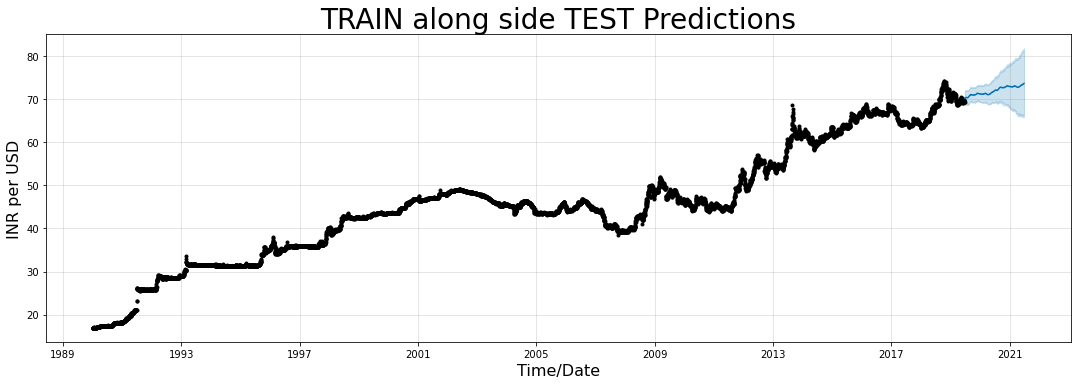

In [17]:
# Plot the forecast
#prior scale 0.05
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_fcst,
                 ax=ax)
plt.title('TRAIN along side TEST Predictions',fontdict={'fontsize':28})
plt.xlabel('Time/Date',fontdict={'fontsize':16})
plt.ylabel('INR per USD',fontdict={'fontsize':16})
plt.show()

## Prediction on future data with prior scale 0.05

In [18]:
df=df.reset_index()
df.head()

,ds,y
0,1990-01-01,16.96
1,1990-01-02,16.96
2,1990-01-03,16.99
3,1990-01-04,16.94
4,1990-01-05,16.93


### Reinitialize the data for future prediction

In [19]:

model_= Prophet()
model_.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Make future data for next 300 days

In [20]:
future_global=model_.make_future_dataframe(periods=300,freq='D')

### Predict for next 300 days

In [21]:
prediction=model_.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,16.635797,14.905866,18.303674,16.635797,16.635797,-0.010131,-0.010131,-0.010131,-0.049998,-0.049998,-0.049998,0.039866,0.039866,0.039866,0.0,0.0,0.0,16.625666
1,1990-01-02,16.641314,14.991204,18.345644,16.641314,16.641314,-0.008074,-0.008074,-0.008074,-0.040976,-0.040976,-0.040976,0.032902,0.032902,0.032902,0.0,0.0,0.0,16.633240
2,1990-01-03,16.646830,15.057259,18.380299,16.646830,16.646830,-0.022023,-0.022023,-0.022023,-0.047448,-0.047448,-0.047448,0.025425,0.025425,0.025425,0.0,0.0,0.0,16.624807
3,1990-01-04,16.652346,15.001700,18.288435,16.652346,16.652346,-0.030136,-0.030136,-0.030136,-0.047561,-0.047561,-0.047561,0.017424,0.017424,0.017424,0.0,0.0,0.0,16.622210
4,1990-01-05,16.657862,14.973791,18.372496,16.657862,16.657862,-0.057561,-0.057561,-0.057561,-0.066466,-0.066466,-0.066466,0.008905,0.008905,0.008905,0.0,0.0,0.0,16.600301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,2022-04-17,75.930044,73.446504,77.955005,74.544168,77.162795,-0.249273,-0.249273,-0.249273,0.126224,0.126224,0.126224,-0.375497,-0.375497,-0.375497,0.0,0.0,0.0,75.680771
8511,2022-04-18,75.934989,73.192325,77.804501,74.550756,77.174159,-0.422660,-0.422660,-0.422660,-0.049998,-0.049998,-0.049998,-0.372662,-0.372662,-0.372662,0.0,0.0,0.0,75.512329
8512,2022-04-19,75.939934,73.025076,77.956647,74.544665,77.185449,-0.411163,-0.411163,-0.411163,-0.040976,-0.040976,-0.040976,-0.370187,-0.370187,-0.370187,0.0,0.0,0.0,75.528771
8513,2022-04-20,75.944879,73.240729,77.822215,74.541217,77.196596,-0.415551,-0.415551,-0.415551,-0.047448,-0.047448,-0.047448,-0.368103,-0.368103,-0.368103,0.0,0.0,0.0,75.529328


In [22]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8510,2022-04-17,75.680771,73.446504,77.955005
8511,2022-04-18,75.512329,73.192325,77.804501
8512,2022-04-19,75.528771,73.025076,77.956647
8513,2022-04-20,75.529328,73.240729,77.822215
8514,2022-04-21,75.535841,73.237957,77.747884


### Plotting predictions along side the original data

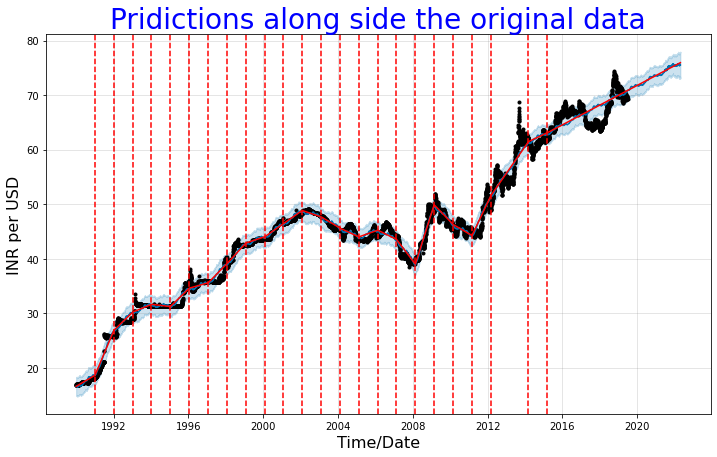

In [23]:
fig=model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model_,prediction)
plt.title('Pridictions along side the original data', {'fontsize': 28,
          'fontweight': 4,
          'color': 'blue', 
          'verticalalignment' : 'center_baseline'},
           pad=.9)
plt.xlabel('Time/Date',fontdict={'fontsize':16})
plt.ylabel('INR per USD',fontdict={'fontsize':16})
plt.show()

In [24]:
model_.changepoints

263    1991-01-03
526    1992-01-07
789    1993-01-08
1051   1994-01-11
1314   1995-01-13
1577   1996-01-17
1840   1997-01-20
2103   1998-01-22
2366   1999-01-26
2628   2000-01-27
2891   2001-01-30
3154   2002-02-01
3417   2003-02-05
3680   2004-02-09
3943   2005-02-10
4205   2006-02-13
4468   2007-02-15
4731   2008-02-19
4994   2009-02-20
5257   2010-02-24
5520   2011-02-28
5782   2012-02-29
6045   2013-03-04
6308   2014-03-06
6571   2015-03-10
Name: ds, dtype: datetime64[ns]

## Plotting prediction vs actuals 

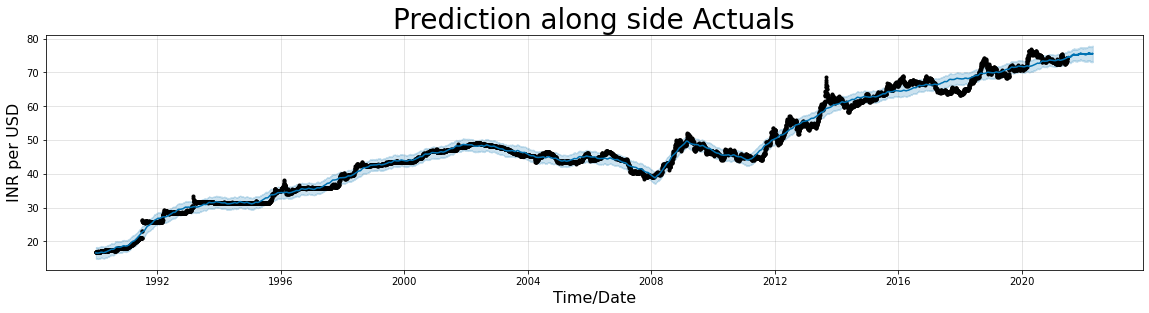

In [25]:
# Plot the forecast
#prior scale 0.05
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(16)
fig = model_.plot(prediction,
                 ax=ax)
plt.title('Prediction along side Actuals',fontdict={'fontsize': 28})
plt.xlabel('Time/Date',fontdict={'fontsize':16})
plt.ylabel('INR per USD',fontdict={'fontsize':16})
plt.show()

The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. In the last 30 daya, there is no “actual” data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.

### Plot components of FBPROPHET model

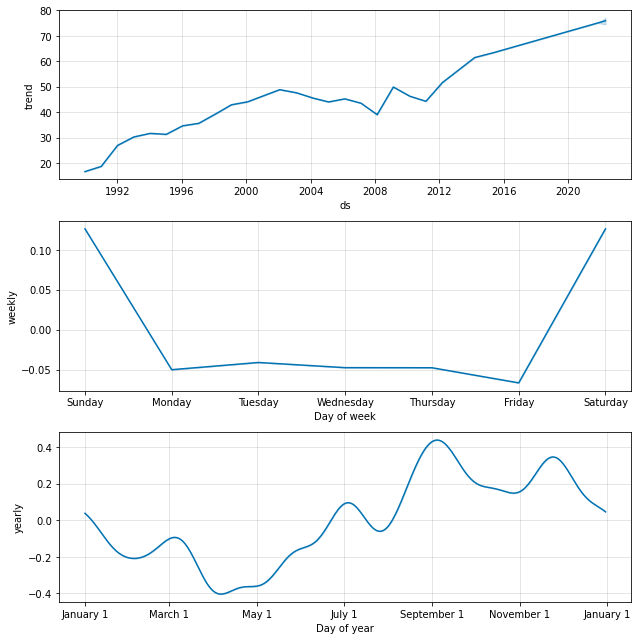

In [26]:
# Plot the components of the model
fig = model_.plot_components(prediction)

In [27]:
metric_df = prediction.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
8510,2022-04-17,75.680771,NaN
8511,2022-04-18,75.512329,NaN
8512,2022-04-19,75.528771,NaN
8513,2022-04-20,75.529328,NaN
8514,2022-04-21,75.535841,NaN


In [28]:
metric_df.dropna(inplace=True)

In [29]:
mean_absolute_percentage_error(y_true=metric_df['y'],y_pred=metric_df['yhat'])

2.015558806602295

# HyperParameter Tuning using ParameterGrid

* `n_changepoints`- is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series.

* `changepoint_prior_scale` - to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

### Defining the parameter grid

In [30]:
from sklearn.model_selection import ParameterGrid
params_grid = {'changepoint_prior_scale':[0.05,0.095,0.1,0.2],'n_changepoints' : [30,35,40,45,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 20


## Prophet Model Tuning

In [31]:
df=df.reset_index(drop=True)
df.head()

,ds,y
0,1990-01-01,16.96
1,1990-01-02,16.96
2,1990-01-03,16.99
3,1990-01-04,16.94
4,1990-01-05,16.93


In [32]:
train=train.reset_index(drop=True)

In [33]:
strt='2019-01-01'
end='2021-06-25'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    model=Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],interval_width=0.95)
    model.fit(df)
    future_global=model.make_future_dataframe(periods=30,freq='D')
    prediction1=model.predict(future_global)
    prediction1[['ds','yhat','yhat_lower','yhat_upper']].tail()
    metric_df1 = prediction1.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
    metric_df1.tail()
    metric_df1.dropna(inplace=True)
   
    MAPE=mean_absolute_percentage_error(y_true=metric_df1['y'],y_pred=metric_df1['yhat'])
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.05, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.9631522715421492
{'changepoint_prior_scale': 0.05, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.834441809088236
{'changepoint_prior_scale': 0.05, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.765027563306919
{'changepoint_prior_scale': 0.05, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7374081504198648
{'changepoint_prior_scale': 0.05, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7062186961283503
{'changepoint_prior_scale': 0.095, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.9002451334399686
{'changepoint_prior_scale': 0.095, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7731305829080526
{'changepoint_prior_scale': 0.095, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.666817286375843
{'changepoint_prior_scale': 0.095, 'n_changepoints': 45}
Mean Absolute Percentage Error(MAPE)------------------------------------ 1.605679282394
{'changepoint_prior_scale': 0.095, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5503535342012238
{'changepoint_prior_scale': 0.1, 'n_changepoints': 30}
Mean Absolute Percentage Error(MAPE)------------------------------------ 1.8968531830980753
{'changepoint_prior_scale': 0.1, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7712802845609925
{'changepoint_prior_scale': 0.1, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.663020676375477
{'changepoint_prior_scale': 0.1, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.6014114197204294
{'changepoint_prior_scale': 0.1, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5374502548319378
{'changepoint_prior_scale': 0.2, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.886808943314179
{'changepoint_prior_scale': 0.2, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7476377865189585
{'changepoint_prior_scale': 0.2, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.6369770355507456
{'changepoint_prior_scale': 0.2, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5606724880642588
{'changepoint_prior_scale': 0.2, 'n_changepoints': 50}
Mean Absolute Percentage Error(MAPE)------------------------------------ 1.4999304686866908


### Sorting the models based on MAPE

In [34]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()  

,MAPE,Parameters
0,1.499930,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
1,1.537450,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
2,1.550354,"{'changepoint_prior_scale': 0.095, 'n_changepo..."
3,1.560672,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
4,1.601411,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."


Out of total 15 models, we will select the parameters which has the least MAPE to train the final model and predict the next 30 days Dollar Exchange Rates.

In [35]:
print(parameters.iloc[0,1])

{'changepoint_prior_scale': 0.2, 'n_changepoints': 50}


## Building the final Model

In [36]:
final_model_ = Prophet(changepoint_prior_scale=0.2,n_changepoints=50)
final_model_.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### predicting for next 300 days

In [37]:
final_future=final_model_.make_future_dataframe(periods=300,freq='D')

In [38]:
final_prediction=final_model_.predict(final_future)
final_prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8510,2022-04-17,75.125847,71.885844,78.203147
8511,2022-04-18,75.375623,72.126020,78.131544
8512,2022-04-19,75.391535,71.799528,78.622013
8513,2022-04-20,75.391663,72.025891,78.500000
8514,2022-04-21,75.397740,72.057848,78.427630


## Plotting the prediction along side actuals

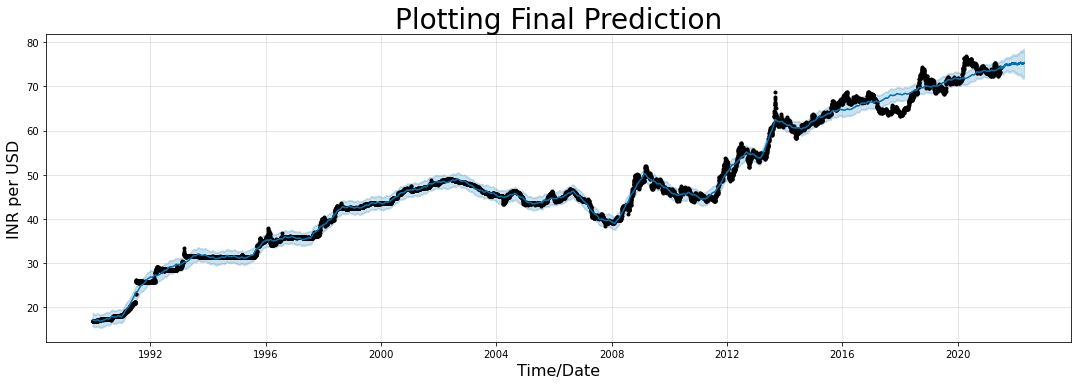

In [39]:
# Plot the forecast
# prior scale 0.095
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig =final_model_.plot(final_prediction,
                 ax=ax)
plt.title('Plotting Final Prediction',fontdict={'fontsize' : 28})
plt.xlabel('Time/Date',fontdict={'fontsize':16})
plt.ylabel('INR per USD',fontdict={'fontsize':16})
plt.show()

## Incorporating change points

NameError: name 'Plt' is not defined

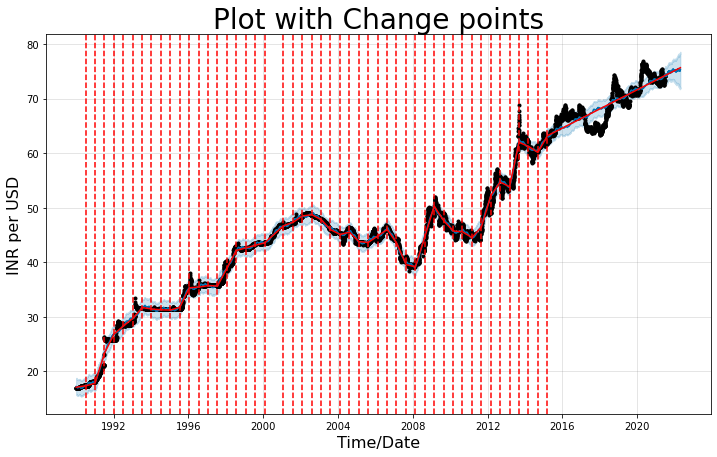

In [40]:
fig=final_model_.plot(final_prediction)
a=add_changepoints_to_plot(fig.gca(),final_model_,final_prediction)
plt.title('Plot with Change points', fontdict={'fontsize':28})
plt.xlabel('Time/Date',fontdict={'fontsize':16})
plt.ylabel('INR per USD',fontdict={'fontsize':16})
Plt.show()

In [41]:
final_metric_df = final_prediction.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
final_metric_df.tail(12)

,ds,yhat,y
8503,2022-04-10,75.071149,NaN
8504,2022-04-11,75.321052,NaN
8505,2022-04-12,75.337809,NaN
8506,2022-04-13,75.339392,NaN
8507,2022-04-14,75.347413,NaN
8508,2022-04-15,75.336739,NaN
8509,2022-04-16,75.118235,NaN
8510,2022-04-17,75.125847,NaN
8511,2022-04-18,75.375623,NaN
8512,2022-04-19,75.391535,NaN


In [42]:
final_metric_df.dropna(inplace=True)
mean_absolute_percentage_error(y_true=final_metric_df['y'],y_pred=final_metric_df['yhat'])

1.4999304686866908

# Conclusion

We have achieved the MAPE score of 1.49 on the overall data which seems to be good. However, we shall decide on the model after comparing with other models.